kode 3 find it

In [1]:
import pandas as pd

# Load the datasets
training_data = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\data_training_all.csv")
test_features = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\test_features.csv")
submission_format = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\submission_format.csv")


In [43]:
train_features.tail()

,Unnamed: 0,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
3812,3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0
3816,3816,1961,Sarjana,Menikah,130512000.0,0.0,0.0,70.0,329749.0,600831.0,420784.0,161840.0,3.0,7.0,15.0,0.0,2014-01-25,0


In [44]:
na = train_features.isna().sum()
len_data =  len(train_features)
percentage = (na/len_data)*100
percentage_missing_value = pd.concat([na, percentage],axis=1)
percentage_missing_value.columns = ['jumlah hilang', 'persentase hilang']
percentage_missing_value


,jumlah hilang,persentase hilang
Unnamed: 0,0,0.000000
tahun_kelahiran,0,0.000000
pendidikan,189,4.951533
status_pernikahan,212,5.554100
pendapatan,190,4.977731
jumlah_anak_balita,190,4.977731
jumlah_anak_remaja,204,5.344511
terakhir_belanja,172,4.506157
belanja_buah,181,4.741944
belanja_daging,178,4.663348


### **Pre-Processing**

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = ['pendidikan', 'status_pernikahan']
numerical_cols = ['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 
                  'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
                  'pembelian_diskon', 'pembelian_web', 'pembelian_toko']
binary_col = ['keluhan']

# Define transformers for the numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = SimpleImputer(strategy='most_frequent')

# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('bin', binary_transformer, binary_col)
    ])

# Apply transformations to the training data
X = training_data.drop(['jumlah_promosi', 'Unnamed: 0', 'tanggal_menjadi_anggota'], axis=1)
y = training_data['jumlah_promosi']

# Fit and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Check the transformed feature shape and type
X_preprocessed.shape, type(X_preprocessed)


((3817, 25), numpy.ndarray)

### **MODELLING**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, 
                                       random_state=42,
                                       min_samples_split=2,
                                       min_samples_leaf = 1
                                       )

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model using macro F1 score
f1_score_val = f1_score(y_val, y_pred, average='macro')
f1_score_val


0.709820109067857

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=1000, 
                               random_state=42,
                               min_samples_split=2,
                               min_samples_leaf=1)

# Train the model
xgb_classifier.fit(X_train, y_train)  # Corrected this line

# Predict on the validation set
y_pred = xgb_classifier.predict(X_val)  # Corrected this line

# Evaluate the model using macro F1 score
f1_score_val = f1_score(y_val, y_pred, average='macro')
f1_score_val


[16:03:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.7018082925163766

### **Tunning**

##### **Grid Search with Cross Validation**

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 1000],
    'max_depth': [None, 10, 20, 30,  40, 50],
    'min_samples_split': [2, 5, 10],
    'max_features':['auto', 'sqrt']
}

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=5,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

({'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 1000},
 0.6947946905623943)

##### **Random Hyperparameter Grid**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



### **Prepocess**

In [12]:
missing_data = train_features.isna().sum()
total_rows = len(train_features)
percentage_missing_data = (missing_data/total_rows)*100
missing_info = pd.concat([missing_data, percentage_missing_data], axis= True)
missing_info.columns = ['Total Missing Data','Percentage Missing Data']
missing_info

,Total Missing Data,Percentage Missing Data
tahun_kelahiran,0,0.000000
pendidikan,189,4.951533
status_pernikahan,212,5.554100
pendapatan,190,4.977731
jumlah_anak_balita,190,4.977731
jumlah_anak_remaja,204,5.344511
terakhir_belanja,172,4.506157
belanja_buah,181,4.741944
belanja_daging,178,4.663348
belanja_ikan,193,5.056327


C:\Users\HAJRAN\AppData\Local\Temp\ipykernel_4444\3112358343.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_features.corr(), vmin=-1, vmax=1, annot=True)


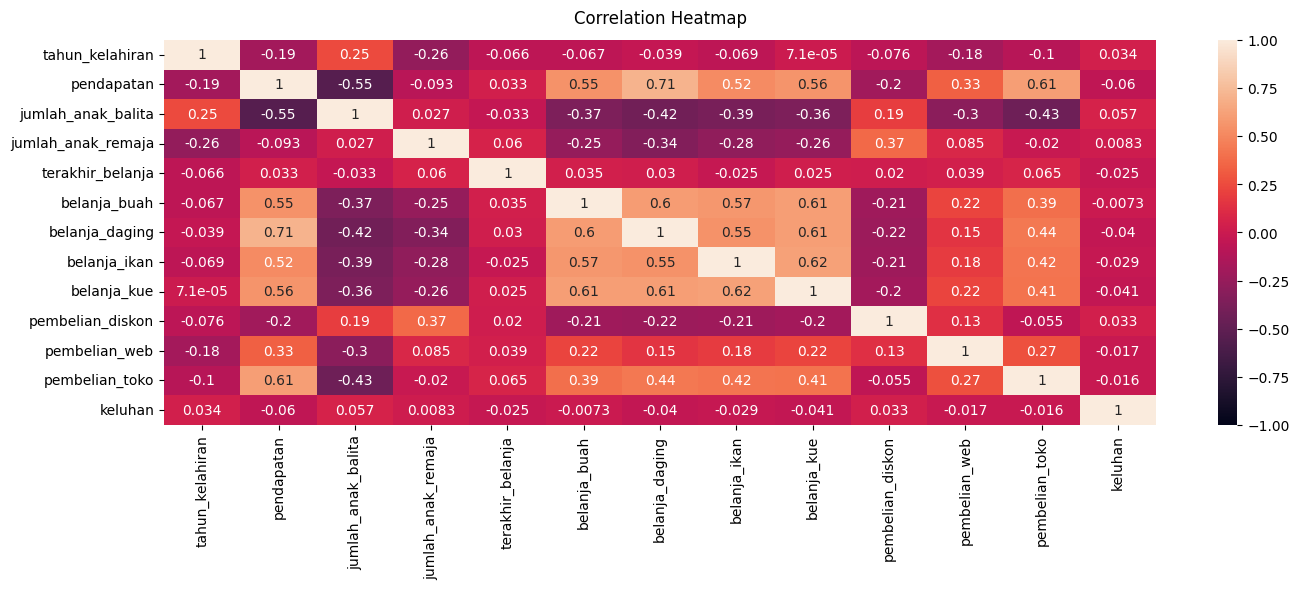

In [37]:
# Increase the size of the heatmap.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_features.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);